In [ ]:
from sympy import symbols, Function, diff, simplify, latex

# Define symbols
lam = symbols('lambda')
z = Function('z')(lam)
dA = Function('d_A')(lam)
H = Function('mathcal{H}')(lam)
theta = Function('hat{theta}')(lam)
sigma_sq = Function('|hat{sigma}|^2')(lam) # Treated as a scalar magnitude squared
R = Function('mathcal{R}')(lam)

# 1. Define Basic Derivatives w.r.t lambda (from note_for_jonas.pdf Eq 1)
# dz/dlambda = -(1+z)^2 * H
dz_dlam = -(1 + z)**2 * H

# d(dA)/dlambda = 0.5 * theta * dA
ddA_dlam = 0.5 * theta * dA

# d(theta)/dlambda = -0.5*theta^2 - 2*sigma^2 - R (Raychaudhuri Eq)
dtheta_dlam = -0.5 * theta**2 - 2 * sigma_sq - R

# 2. Define the Operator d/dz
def d_dz(expression):
    # Chain rule: d/dz = (d/dlambda) * (dlambda/dz)
    # dlambda/dz = 1 / (dz/dlambda) = -1 / ((1+z)^2 * H)
    expr_dlam = diff(expression, lam)
    
    # Substitute known transport derivatives
    # Note: We must substitute d(dA)/dlam and d(theta)/dlam. 
    # We leave dH/dlam, dR/dlam, dSigma/dlam as symbolic derivatives.
    expr_dlam = expr_dlam.subs({
        diff(dA, lam): ddA_dlam,
        diff(theta, lam): dtheta_dlam,
        diff(z, lam): dz_dlam
    })
    
    return -1 / ((1 + z)**2 * H) * expr_dlam

# 3. Define the Second Derivative (Eq 5 from note_for_jonas.pdf)
# Term in brackets: K
# Note: The note uses H^{-1} * H' which is (1/H) * diff(H, lam)
K = -2 * sigma_sq - R + 2 * theta * (1 + z) * H - theta * (1/H) * diff(H, lam)

# Full 2nd derivative expression
d2dA_dz2 = (dA / (2 * (1 + z)**4 * H**2)) * K

# 4. Compute the Third Derivative
d3dA_dz3 = d_dz(d2dA_dz2)

# Simplify
result = simplify(d3dA_dz3)

print("Symbolic Expression for d^3(dA)/dz^3:")
print(result)

# To view in LaTeX format for your note:
print("\nLaTeX Code:")
print(latex(result))

Symbolic Expression for d^3(dA)/dz^3:
(4*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*(z(lambda) + 1)*mathcal{H}(lambda)**2 + 0.5*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*hat{theta}(lambda)*mathcal{H}(lambda) - 2*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*Derivative(mathcal{H}(lambda), lambda) + (-(0.5*hat{theta}(lambda)**2 + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*Derivative(mathcal{H}(lambda), lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), (lambda, 2)))*mathcal{H}(lambda) + (2*(z(lambda) + 1)**2*hat{theta}(lambda)*mathcal{H}(lambda)**2 +

In [ ]:
result

(4*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*(z(lambda) + 1)*mathcal{H}(lambda)**2 + 0.5*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*hat{theta}(lambda)*mathcal{H}(lambda) - 2*((-2*(z(lambda) + 1)*hat{theta}(lambda)*mathcal{H}(lambda) + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*mathcal{H}(lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), lambda))*Derivative(mathcal{H}(lambda), lambda) + (-(0.5*hat{theta}(lambda)**2 + mathcal{R}(lambda) + 2*|hat{sigma}|^2(lambda))*Derivative(mathcal{H}(lambda), lambda) + hat{theta}(lambda)*Derivative(mathcal{H}(lambda), (lambda, 2)))*mathcal{H}(lambda) + (2*(z(lambda) + 1)**2*hat{theta}(lambda)*mathcal{H}(lambda)**2 + 2*(z(lambda) + 1)*(0.5*hat{theta}(lam

In [11]:
k0_cart = [1, 2, 3]
#k0_cnorm = k0_cart / sqrt(k0_cart[1]^2 + k0_cart[2]^2 + k0_cart[3]^2)

3-element Vector{Int64}:
 1
 2
 3

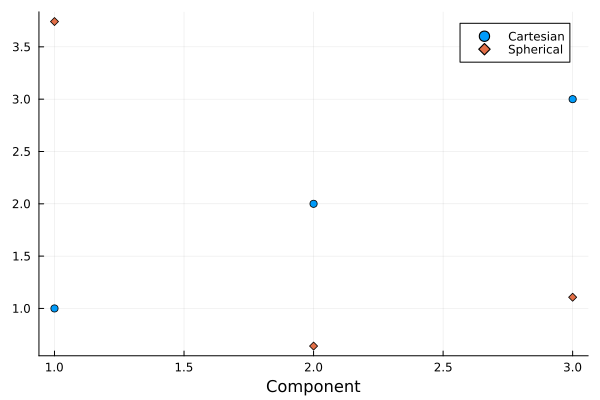

In [ ]:
kr = sqrt(k0_cart[1]^2 + k0_cart[2]^2 + k0_cart[3]^2)
kθ = atan(sqrt(k0_cart[1]^2 + k0_cart[2]^2), k0_cart[3])
kϕ = atan(k0_cart[2], k0_cart[1])



SystemError: SystemError: opening file "data/healpix_kx512.dat": No such file or directory

In [11]:
using NPZ

Nside = 1
xyzs = npzread("data/healpix_$(Nside).npy")

12×3 Matrix{Float64}:
  0.527046      0.527046      0.666667
 -0.527046      0.527046      0.666667
 -0.527046     -0.527046      0.666667
  0.527046     -0.527046      0.666667
  1.0           0.0           6.12323e-17
  6.12323e-17   1.0           6.12323e-17
 -1.0           1.22465e-16   6.12323e-17
 -1.83697e-16  -1.0           6.12323e-17
  0.527046      0.527046     -0.666667
 -0.527046      0.527046     -0.666667
 -0.527046     -0.527046     -0.666667
  0.527046     -0.527046     -0.666667

In [12]:
for xyz in eachrow(xyzs)
    kx0, ky0, kz0 = xyz
    println("kx0: $kx0, ky0: $ky0, kz0: $kz0")
end

kx0: 0.5270462766947299, ky0: 0.5270462766947298, kz0: 0.6666666666666666
kx0: -0.5270462766947298, ky0: 0.5270462766947299, kz0: 0.6666666666666666
kx0: -0.5270462766947301, ky0: -0.5270462766947296, kz0: 0.6666666666666666
kx0: 0.5270462766947298, ky0: -0.52704627669473, kz0: 0.6666666666666666
kx0: 1.0, ky0: 0.0, kz0: 6.123233995736766e-17
kx0: 6.123233995736766e-17, ky0: 1.0, kz0: 6.123233995736766e-17
kx0: -1.0, ky0: 1.2246467991473532e-16, kz0: 6.123233995736766e-17
kx0: -1.8369701987210297e-16, ky0: -1.0, kz0: 6.123233995736766e-17
kx0: 0.5270462766947298, ky0: 0.5270462766947298, kz0: -0.6666666666666667
kx0: -0.5270462766947298, ky0: 0.5270462766947298, kz0: -0.6666666666666667
kx0: -0.5270462766947301, ky0: -0.5270462766947295, kz0: -0.6666666666666667
kx0: 0.5270462766947297, ky0: -0.5270462766947299, kz0: -0.6666666666666667


In [19]:
using Healpix

Nside = 1
npix  = nside2npix(Nside)

m = HealpixMap{Float64, NestedOrder}(Nside)

theta = zeros(Float64, npix)
phi   = zeros(Float64, npix)

for i in 1:npix
    theta[i], phi[i] = pix2ang(m, i)
end
xyzs = ang2vec.(theta, phi)

12-element Vector{Tuple{Float64, Float64, Float64}}:
 (0.5270462766947299, 0.5270462766947298, 0.6666666666666666)
 (-0.5270462766947298, 0.5270462766947299, 0.6666666666666666)
 (-0.5270462766947301, -0.5270462766947296, 0.6666666666666666)
 (0.5270462766947298, -0.52704627669473, 0.6666666666666666)
 (1.0, 0.0, 6.123233995736766e-17)
 (6.123233995736766e-17, 1.0, 6.123233995736766e-17)
 (-1.0, 1.2246467991473532e-16, 6.123233995736766e-17)
 (-1.8369701987210297e-16, -1.0, 6.123233995736766e-17)
 (0.5270462766947298, 0.5270462766947298, -0.6666666666666667)
 (-0.5270462766947298, 0.5270462766947298, -0.6666666666666667)
 (-0.5270462766947301, -0.5270462766947295, -0.6666666666666667)
 (0.5270462766947297, -0.5270462766947299, -0.6666666666666667)

In [24]:
kx0, ky0, kz0 = xyzs[1].*0.1

(0.052704627669472995, 0.05270462766947298, 0.06666666666666667)

In [25]:
kx0

0.052704627669472995

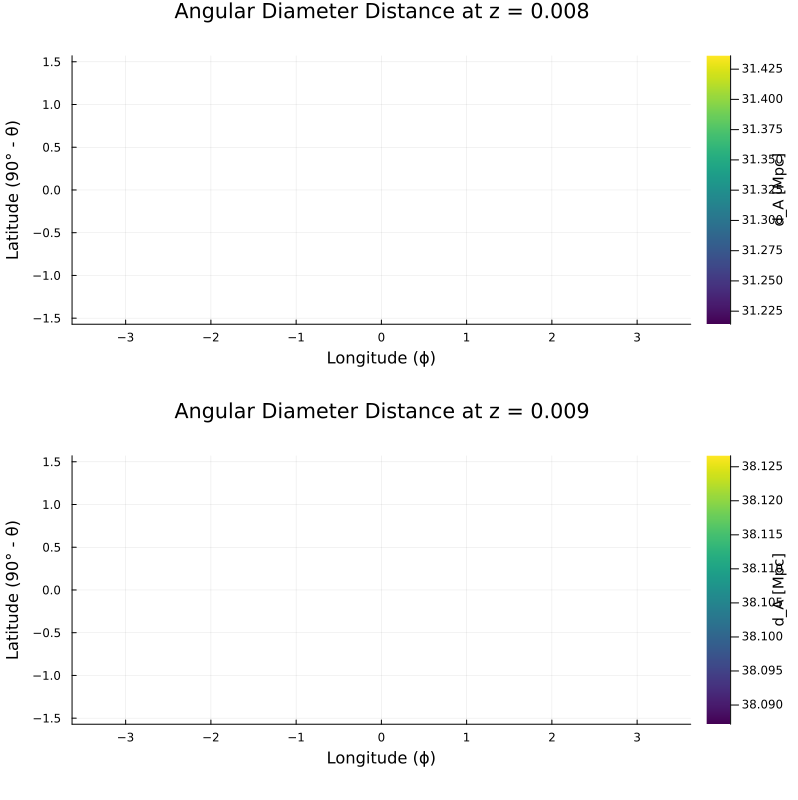

y points not sorted in ascending order
y points not sorted in ascending order
y points not sorted in ascending order
y points not sorted in ascending order
y points not sorted in ascending order
y points not sorted in ascending order


In [1]:
using Healpix
using Plots
gr()

# 1. Load the exact data you just calculated
dA_z008_vals = [
    31.241474136207326, 31.281536745775735, 31.23926447998365, 31.281825169360634,
    31.397120020049805, 31.400101887345446, 31.347714464383554, 31.34741406068748,
    31.397102570680765, 31.34771445774708,  31.4001115816759,   31.34738746372407,
    31.241454094509727, 31.239247075991006, 31.281527377523876, 31.281833062447113,
    31.21422065955349,  31.216038631054612, 31.2160410584108,   31.214228818744772,
    31.31361247644888,  31.35989725214138,  31.271007806322544, 31.31358767012834,
    31.436073983437346, 31.433296842576958, 31.43329667901768,  31.436073959330432,
    31.31361247644888,  31.271007830071966, 31.359897515435836, 31.31358767012834,
    31.28182670014205,  31.28154056191616,  31.239251338510332, 31.24145852410025,
    31.34739074706634,  31.400101893307077, 31.347714461621045, 31.397118746897878,
    31.347387661772828, 31.34771094211588,  31.40010189049674,  31.39711872396319,
    31.281825248114938, 31.239259046031123, 31.281536796914907, 31.241454618314673
]

dA_z009_vals = [
    38.09308466771043,  38.10116237065436,  38.092618984595276, 38.101219358222075,
    38.12095980124751,  38.12141120208887,  38.11308563445881,  38.1130310963876,
    38.120959068034935, 38.1130847112299,   38.121410871777655, 38.113031397650126,
    38.0930871664572,   38.092620290540204, 38.10116487857972,  38.101220495756266,
    38.08717942911085,  38.08758820904093,  38.087587177156834, 38.08718112608891,
    38.10714611073114,  38.11510380595129,  38.09910973229542,  38.10714572768841,
    38.126614234145265, 38.12622902420622,  38.126228916714716, 38.126614153544324,
    38.10714611073114,  38.09910154093126,  38.1151055077573,   38.10714572768841,
    38.10122045446983,  38.10116497599612,  38.09262014794708,  38.093087100298746,
    38.113031475003915, 38.121410452598724, 38.11308285494948,  38.120959033868495,
    38.11303145866525,  38.113086879877905, 38.12141024844581,  38.12095800717438,
    38.10121820478637,  38.09261943043132,  38.101163645320334, 38.09308610218188
]

# 2. Reconstruct the HEALPix maps using your Nested order
Nside = 2
map_008 = HealpixMap{Float64, NestedOrder}(Nside)
map_009 = HealpixMap{Float64, NestedOrder}(Nside)

for i in 1:nside2npix(Nside)
    map_008[i] = dA_z008_vals[i]
    map_009[i] = dA_z009_vals[i]
end

# 3. Create a high-resolution viewing grid (Equirectangular Projection)
n_lat, n_lon = 180, 360
lat_grid = range(π/2, -π/2, length=n_lat)  # 90° to -90°
lon_grid = range(-π, π, length=n_lon)      # -180° to 180°

grid_008 = zeros(n_lat, n_lon)
grid_009 = zeros(n_lat, n_lon)

# 4. Map the grid coordinates back into the HEALPix pixels
for i in 1:n_lat
    for j in 1:n_lon
        # Convert latitude to colatitude (θ) and shift longitude (ϕ) to [0, 2π]
        θ_view = π/2 - lat_grid[i]
        ϕ_view = lon_grid[j] + π
        
        # Find which HEALPix pixel owns this viewing angle
        pix_idx = ang2pix(map_008, θ_view, ϕ_view)
        
        grid_008[i, j] = map_008[pix_idx]
        grid_009[i, j] = map_009[pix_idx]
    end
end

# 5. Plotting! 
# We reverse the arrays to display standard map orientation (North up)
p1 = heatmap(lon_grid, lat_grid, reverse(grid_008, dims=1), 
    title="Angular Diameter Distance at z = 0.008", 
    xlabel="Longitude (ϕ)", ylabel="Latitude (90° - θ)",
    colorbar_title="d_A [Mpc]",
    color=:viridis, aspect_ratio=1.0)

p2 = heatmap(lon_grid, lat_grid, reverse(grid_009, dims=1), 
    title="Angular Diameter Distance at z = 0.009", 
    xlabel="Longitude (ϕ)", ylabel="Latitude (90° - θ)",
    colorbar_title="d_A [Mpc]",
    color=:viridis, aspect_ratio=1.0)

# Combine them into a single figure
display(plot(p1, p2, layout=(2,1), size=(800, 800)))

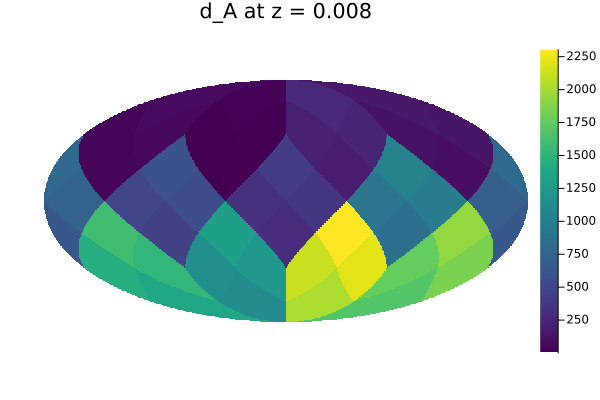

In [5]:
using Healpix, Plots
# Healpix
Nside = 2 # Keep between 2^2 and 2^9 for stability.
npix = nside2npix(Nside)
map = HealpixMap{Float64, NestedOrder}(Nside)

for pixel in 1:npix
    theta_hp, phi_hp = pix2ang(map, pixel)
    map.pixels[pixel] = pixel^2
end
display(plot(map, Healpix.mollweide, title="d_A at z = 0.008", color=:viridis, framestyle=:none))